<a href="https://colab.research.google.com/github/Tawan-Kh/NGCF/blob/main/cudson%5Brcusc2025%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls

 check_in_transaction_20240422-ส่งกนห.xlsx   sample_data
 CUDSON_Dashboard_Data_20250404.xlsx	   'รายชื่อส่งให้ กนห.5-เม.ย.-68.xlsx'


In [ ]:
#read files

students = pd.read_excel('รายชื่อส่งให้ กนห.5-เม.ย.-68.xlsx',0, dtype=str)
CUDSON_ส่งทิว = pd.ExcelFile('/content/CUDSON_Dashboard_Data_20250404.xlsx')
check_in_xlsx = pd.ExcelFile('check_in_transaction_20240422-ส่งกนห.xlsx')
check_in = pd.read_excel(check_in_xlsx, 0,  dtype=str)
activities = pd.read_excel(CUDSON_ส่งทิว, 1,  dtype=str)
# add_score = pd.read_csv('/content/เพิ่มคะแนนสำหรับการร้องเรียน - Sheet1.csv', names=["studentID", "score"], dtype={"studentID":str, "score":float})


# Check-in preprocessing

In [ ]:
check_in.dtypes

,0
รหัสนิสิต,object
รหัสกิจกรรม,object
เวลาเช็คอิน,object


In [ ]:
check_in.head()

,รหัสนิสิต,รหัสกิจกรรม,เวลาเช็คอิน
0,6431042337,2147,2024-08-01 18:00:00
1,6440047022,2149,2024-08-01 14:07:42
2,6531003037,2147,2024-08-01 23:06:41
3,6531004637,2147,2024-08-01 18:45:48
4,6531005237,2147,2024-08-01 20:29:29


In [ ]:
check_in['เวลาเช็คอิน'] = check_in['เวลาเช็คอิน'].apply(pd.to_datetime)

In [ ]:
check_in['เวลาเช็คอิน'].min()

Timestamp('2024-08-01 00:01:36')

In [ ]:
in_time_check_in = check_in[(check_in['เวลาเช็คอิน'] < "2025-03-31") & (check_in['เวลาเช็คอิน'] > "2024-08-05")]
in_time_check_in

,รหัสนิสิต,รหัสกิจกรรม,เวลาเช็คอิน
261,6440088722,2149,2024-08-05 13:22:38
262,6441059722,2149,2024-08-05 16:00:54
263,6540200722,2149,2024-08-05 10:33:43
264,6543022335,2122,2024-08-05 01:06:01
265,6631318023,2142,2024-08-05 16:43:14
...,...,...,...
18785,6730088233,2744,2025-03-30 15:24:54
18786,6731265330,2717,2025-03-30 11:27:02
18787,6750002340,2720,2025-03-30 18:44:50
18788,6750038040,2720,2025-03-30 18:44:46


In [ ]:
in_time_check_in['เวลาเช็คอิน'].max()

Timestamp('2025-03-30 21:08:01')

In [ ]:
in_time_check_in['เวลาเช็คอิน'].min()

Timestamp('2024-08-05 00:23:10')

In [ ]:
in_time_check_in

,รหัสนิสิต,รหัสกิจกรรม,เวลาเช็คอิน
261,6440088722,2149,2024-08-05 13:22:38
262,6441059722,2149,2024-08-05 16:00:54
263,6540200722,2149,2024-08-05 10:33:43
264,6543022335,2122,2024-08-05 01:06:01
265,6631318023,2142,2024-08-05 16:43:14
...,...,...,...
18785,6730088233,2744,2025-03-30 15:24:54
18786,6731265330,2717,2025-03-30 11:27:02
18787,6750002340,2720,2025-03-30 18:44:50
18788,6750038040,2720,2025-03-30 18:44:46


In [ ]:
in_time_check_in.drop(['เวลาเช็คอิน'], axis=1, inplace=True)

<ipython-input-14-de59ddd0682d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_time_check_in.drop(['เวลาเช็คอิน'], axis=1, inplace=True)


In [ ]:
in_time_check_in.head()

,รหัสนิสิต,รหัสกิจกรรม
261,6440088722,2149
262,6441059722,2149
263,6540200722,2149
264,6543022335,2122
265,6631318023,2142


# Activities preprocessing

## Drop Columns

In [ ]:
activities.head()

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,รายละเอียดกิจกรรมแบบสั้น,รายละเอียดกิจกรรมแบบยาว,คะแนนการจัดการตนเอง (SM),คะแนนการจัดการอารมณ์ (EM),คะแนนการสื่อสาร (CO),คะแนนการทำงานร่วมกัน (CL),คะแนนการแก้ปัญหา (PS),...,สถานที่จัดกิจกรรม,กิจกรรมสำหรับใคร,Active/Inactive,กิจกรรมสร้างเวลาใด,กิจกรรมอัปเดตเวลาใด,หมวดกิจกรรม,เวลาในการเผยแผร่,ชื่อผู้สร้าง,ชื่อผู้อัปเดต,สถานะกิจกรรมในระบบ
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,แนะนำโครงการส่งเสริมพัฒนาสมรรถนะนิสิตทางศิลปะร...,ปฐมนิเทศนิสิตใหม่ \nโครงการส่งเสริมพัฒนาสมรรถน...,3,0,0,0,0,...,ห้อง 202 ชั้น 2 อาคารมหิตลาธิเบศร,นิสิตโครงการพิเศษ,Active,2023-06-13 15:32:47,2024-07-26 15:01:42,วิชาการ,2023-06-13 15:47:10,อิงอร,อิงอร,มีข้อมูลในระบบ
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,YOUTHDAY : Hope is เปลี่ยนเราเป็นความหวัง ผลัก...,YOUTHDAY : Hope is เปลี่ยนเราเป็นความหวัง ผลัก...,4,4,4,4,4,...,Lido Connect,นิสิตทุกชั้นปี,Inactive,2024-01-14 18:15:37,2024-01-22 11:53:24,สังคม/บำเพ็ญประโยชน์,2024-01-22 11:53:24,ธีรวัจน์,ธีรวัจน์,มีข้อมูลในระบบ
2,1791,Arch.Act.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,ส่งเสริมนิสิตให้ออกกำลังกายผ่านกีฬาฟุตบอล,คณะสถาปัตยกรรมศาสตร์ ร่วมกับคณะศิลปกรรมศาสตร์ ...,4,2,4,5,4,...,สนามหน้าลานพระบรมรูป 2 รัชกาล,นิสิตทุกชั้นปี,Inactive,2024-02-29 16:30:39,2024-03-29 09:38:21,กีฬา สุขภาพ และสุขภาวะ,2024-02-29 16:30:44,ธีรดา,ญาน์ศิกาญจน์,มีข้อมูลในระบบ
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),สตาฟทำกิจกรรมกับน้องๆมูลนิธิบ้านนกขมิ้น\nวันเส...,3,4,4,5,3,...,หอพักนิสิต,นิสิตทุกชั้นปี,Active,2024-03-23 14:14:45,2024-03-23 14:17:07,สังคม/บำเพ็ญประโยชน์,2024-03-23 14:14:47,นายบรรณวัชร,นายบรรณวัชร,มีข้อมูลในระบบ
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,Global Youth MIDORI platform (GYM) 2024,Overview\nThe United Nations University Instit...,4,4,4,4,4,...,online session,undergraduate and graduate students,Active,2024-06-20 13:21:24,2024-06-20 14:25:33,กิจกรรมนานาชาติ,2024-06-20 13:21:30,sukwanchat,sukwanchat,มีข้อมูลในระบบ


In [ ]:
activities.columns

Index(['ID', 'รหัสกิจกรรม', 'ชื่อกิจกรรม', 'รายละเอียดกิจกรรมแบบสั้น',
       'รายละเอียดกิจกรรมแบบยาว', 'คะแนนการจัดการตนเอง (SM)',
       'คะแนนการจัดการอารมณ์ (EM)', 'คะแนนการสื่อสาร (CO)',
       'คะแนนการทำงานร่วมกัน (CL)', 'คะแนนการแก้ปัญหา (PS)',
       'คะแนนการขับเคลื่อนสังคม (ST)', 'ข้อมูลเพิ่มเติม', 'อีเมล',
       'เบอร์โทรติดต่อ', 'ประเภทกิจกรรม', 'รูปแบบกิจกรรม',
       'วันที่เริ่มกิจกรรม', 'วันที่สุดสิ้นกิจกรรม',
       'วันที่เปิดรับสมัครกิจกรรม', 'วันที่ปิดรับสมัครกิจกรรม',
       'วันที่ขึ้น PR', 'วันที่สิ้นสุด PR', 'จำนวนคนสมัคร',
       'จำนวนรับสมัครสูงสุด', 'tag กิจกรรม', 'ชื่อผู้จัดกิจกรรม',
       'รายละเอียดผู้จัดกิจกรรม', 'สถานที่จัดกิจกรรม', 'กิจกรรมสำหรับใคร',
       'Active/Inactive', 'กิจกรรมสร้างเวลาใด', 'กิจกรรมอัปเดตเวลาใด',
       'หมวดกิจกรรม', 'เวลาในการเผยแผร่', 'ชื่อผู้สร้าง', 'ชื่อผู้อัปเดต',
       'สถานะกิจกรรมในระบบ'],
      dtype='object')

In [ ]:
activities.drop(['คะแนนการจัดการตนเอง (SM)',
       'คะแนนการจัดการอารมณ์ (EM)', 'คะแนนการสื่อสาร (CO)',
       'คะแนนการทำงานร่วมกัน (CL)', 'คะแนนการแก้ปัญหา (PS)',
       'คะแนนการขับเคลื่อนสังคม (ST)', 'ข้อมูลเพิ่มเติม', 'อีเมล',
       'เบอร์โทรติดต่อ','ประเภทกิจกรรม', 'รูปแบบกิจกรรม',
       'วันที่เปิดรับสมัครกิจกรรม', 'วันที่ปิดรับสมัครกิจกรรม',
       'วันที่ขึ้น PR', 'วันที่สิ้นสุด PR', 'จำนวนคนสมัคร',
       'จำนวนรับสมัครสูงสุด', 'tag กิจกรรม', 'สถานที่จัดกิจกรรม', 'กิจกรรมสำหรับใคร', 'กิจกรรมอัปเดตเวลาใด',
        'เวลาในการเผยแผร่', 'ชื่อผู้สร้าง', 'ชื่อผู้อัปเดต','หมวดกิจกรรม', 'ชื่อผู้จัดกิจกรรม', 'รายละเอียดผู้จัดกิจกรรม'], axis=1, inplace=True)

In [ ]:
activities.head()

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,รายละเอียดกิจกรรมแบบสั้น,รายละเอียดกิจกรรมแบบยาว,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,Active/Inactive,กิจกรรมสร้างเวลาใด,สถานะกิจกรรมในระบบ
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,แนะนำโครงการส่งเสริมพัฒนาสมรรถนะนิสิตทางศิลปะร...,ปฐมนิเทศนิสิตใหม่ \nโครงการส่งเสริมพัฒนาสมรรถน...,2024-08-16,2024-08-16,Active,2023-06-13 15:32:47,มีข้อมูลในระบบ
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,YOUTHDAY : Hope is เปลี่ยนเราเป็นความหวัง ผลัก...,YOUTHDAY : Hope is เปลี่ยนเราเป็นความหวัง ผลัก...,2024-09-21,2024-09-21,Inactive,2024-01-14 18:15:37,มีข้อมูลในระบบ
2,1791,Arch.Act.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,ส่งเสริมนิสิตให้ออกกำลังกายผ่านกีฬาฟุตบอล,คณะสถาปัตยกรรมศาสตร์ ร่วมกับคณะศิลปกรรมศาสตร์ ...,2025-02-12,2024-02-20,Inactive,2024-02-29 16:30:39,มีข้อมูลในระบบ
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),สตาฟทำกิจกรรมกับน้องๆมูลนิธิบ้านนกขมิ้น\nวันเส...,2024-12-23,2024-03-23,Active,2024-03-23 14:14:45,มีข้อมูลในระบบ
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,Global Youth MIDORI platform (GYM) 2024,Overview\nThe United Nations University Instit...,2024-08-05,2024-08-07,Active,2024-06-20 13:21:24,มีข้อมูลในระบบ


In [ ]:
activities.columns

Index(['ID', 'รหัสกิจกรรม', 'ชื่อกิจกรรม', 'รายละเอียดกิจกรรมแบบสั้น',
       'รายละเอียดกิจกรรมแบบยาว', 'วันที่เริ่มกิจกรรม', 'วันที่สุดสิ้นกิจกรรม',
       'Active/Inactive', 'กิจกรรมสร้างเวลาใด', 'สถานะกิจกรรมในระบบ'],
      dtype='object')

In [ ]:
#activities = activities[activities['ชื่อกิจกรรม'] == 'ประชุมหอพักนิสิต ประจำภาคปลาย ปีการศึกษา 2567','ประชุมหอพักนิสิต ประจำภาคต้น ปีการศึกษา 2567','โครงการอบรมและฝึกซ้อมหนีไฟในอาคารหอพักนิสิตประจำปีการศึกษา 2567']
activities = activities[activities['สถานะกิจกรรมในระบบ'] == 'มีข้อมูลในระบบ']
activities.drop(['สถานะกิจกรรมในระบบ','Active/Inactive'], axis=1, inplace=True)
activities.drop(['รายละเอียดกิจกรรมแบบสั้น','รายละเอียดกิจกรรมแบบยาว'], axis=1, inplace=True)

<ipython-input-21-6795ef088f62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities.drop(['สถานะกิจกรรมในระบบ','Active/Inactive'], axis=1, inplace=True)
<ipython-input-21-6795ef088f62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities.drop(['รายละเอียดกิจกรรมแบบสั้น','รายละเอียดกิจกรรมแบบยาว'], axis=1, inplace=True)


## Transform รหัสกิจกรรม

In [ ]:
activities.head()

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2024-08-16,2024-08-16,2023-06-13 15:32:47
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-09-21,2024-09-21,2024-01-14 18:15:37
2,1791,Arch.Act.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2025-02-12,2024-02-20,2024-02-29 16:30:39
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-12-23,2024-03-23,2024-03-23 14:14:45
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-08-05,2024-08-07,2024-06-20 13:21:24


In [ ]:
activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.upper()
activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.replace("-",".")
activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.replace(" ",".")
activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.replace("/",".")
activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.replace("_",".")
activities

<ipython-input-23-d676a5feb388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.upper()
<ipython-input-23-d676a5feb388>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['รหัสกิจกรรม'] = activities['รหัสกิจกรรม'].str.replace("-",".")
<ipython-input-23-d676a5feb388>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2024-08-16,2024-08-16,2023-06-13 15:32:47
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-09-21,2024-09-21,2024-01-14 18:15:37
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2025-02-12,2024-02-20,2024-02-29 16:30:39
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-12-23,2024-03-23,2024-03-23 14:14:45
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-08-05,2024-08-07,2024-06-20 13:21:24
...,...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,2025-02-15,2025-03-23,2025-03-24 13:49:06
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-08,2025-02-08,2025-03-26 13:55:36
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-31,2025-03-31,2025-03-26 14:06:04
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-29,2025-03-30,2025-03-26 15:56:23


## Filter วันเริ่ม สิ้นสุดกิจกรรม

In [ ]:
activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2024-08-16,2024-08-16,2023-06-13 15:32:47
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-09-21,2024-09-21,2024-01-14 18:15:37
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2025-02-12,2024-02-20,2024-02-29 16:30:39
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-12-23,2024-03-23,2024-03-23 14:14:45
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-08-05,2024-08-07,2024-06-20 13:21:24
...,...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,2025-02-15,2025-03-23,2025-03-24 13:49:06
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-08,2025-02-08,2025-03-26 13:55:36
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-31,2025-03-31,2025-03-26 14:06:04
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-29,2025-03-30,2025-03-26 15:56:23


In [ ]:
activities['วันที่เริ่มกิจกรรม'] = pd.to_datetime(activities['วันที่เริ่มกิจกรรม'], format="%Y-%m-%d")
activities['วันที่สุดสิ้นกิจกรรม'] = pd.to_datetime(activities['วันที่สุดสิ้นกิจกรรม'], format="%Y-%m-%d",errors='coerce')


<ipython-input-25-268ede9c0dae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['วันที่เริ่มกิจกรรม'] = pd.to_datetime(activities['วันที่เริ่มกิจกรรม'], format="%Y-%m-%d")
<ipython-input-25-268ede9c0dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['วันที่สุดสิ้นกิจกรรม'] = pd.to_datetime(activities['วันที่สุดสิ้นกิจกรรม'], format="%Y-%m-%d",errors='coerce')


In [ ]:
##activities.iloc[758, 4] = np.datetime64("2024-08-12")

In [ ]:
activities.dtypes

,0
ID,object
รหัสกิจกรรม,object
ชื่อกิจกรรม,object
วันที่เริ่มกิจกรรม,datetime64[ns]
วันที่สุดสิ้นกิจกรรม,datetime64[ns]
กิจกรรมสร้างเวลาใด,object


In [ ]:
activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2024-08-16,2024-08-16,2023-06-13 15:32:47
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-09-21,2024-09-21,2024-01-14 18:15:37
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2025-02-12,2024-02-20,2024-02-29 16:30:39
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-12-23,2024-03-23,2024-03-23 14:14:45
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-08-05,2024-08-07,2024-06-20 13:21:24
...,...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,2025-02-15,2025-03-23,2025-03-24 13:49:06
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-08,2025-02-08,2025-03-26 13:55:36
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-31,2025-03-31,2025-03-26 14:06:04
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-29,2025-03-30,2025-03-26 15:56:23


In [ ]:
activities[((activities['วันที่เริ่มกิจกรรม'] < '2024-08-05') & (activities['วันที่สุดสิ้นกิจกรรม'] < '2024-08-05'))]

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
8,2110,LIBSCI.2024.ศตวรรษที่.21.ครั้งที่.9.ชมรมนักอ่า...,"โครงการชมรมนักอ่าน หัวช้อ ""iSchool Movement an...",2024-08-01,2024-08-01,2024-07-12 11:53:03
20,2155,SA.INTER.67.013,Volunteer staff for รับเพื่อนก้าวใหม่ 2024,2024-08-04,2024-08-04,2024-08-04 10:26:20
49,2185,SGCU67.002.,โครงการต้อนรับและสานสัมพันธ์นิสิตใหม่ ปีการศึก...,2024-08-03,2024-08-04,2024-08-14 20:05:15


In [ ]:
in_time_activities = activities[~((activities['วันที่เริ่มกิจกรรม'] < '2024-08-05') & (activities['วันที่สุดสิ้นกิจกรรม'] < '2024-08-05') )]

In [ ]:
in_time_activities[in_time_activities['วันที่เริ่มกิจกรรม'] < '2024-08-05']

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
23,2158,SGCU67.PHAT.HTC.002,สำรวจค่ายฤดูหนาว ปีการศึกษา 2567,2024-08-01,2024-10-31,2024-08-05 23:26:39
108,2253,CUDSON.CEDS.2024.01,Thailand British Parliament Open Competition 2024,2024-08-03,2024-08-05,2024-08-26 12:48:06


In [ ]:
in_time_activities[in_time_activities['วันที่สุดสิ้นกิจกรรม'] < '2024-08-05']

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,วันที่เริ่มกิจกรรม,วันที่สุดสิ้นกิจกรรม,กิจกรรมสร้างเวลาใด
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2025-02-12,2024-02-20,2024-02-29 16:30:39
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-12-23,2024-03-23,2024-03-23 14:14:45
168,2335,FAA.SA.2567.04,รับเสด็จ ในงานพิธีพระราชทานปริญญาบัตร ประจำปีก...,2024-10-03,2024-03-01,2024-09-30 19:37:29


In [ ]:
in_time_activities.drop(['วันที่เริ่มกิจกรรม', 'วันที่สุดสิ้นกิจกรรม'], inplace=True, axis=1)

<ipython-input-33-1c4391ddd3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_time_activities.drop(['วันที่เริ่มกิจกรรม', 'วันที่สุดสิ้นกิจกรรม'], inplace=True, axis=1)


In [ ]:
activities = in_time_activities

## Edit false record
**SGCU66.009**

In [ ]:
activities[activities['รหัสกิจกรรม'].str.contains('SGCU66.PHAT.CUY.009')]

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37


In [ ]:
activities.loc[111, 'รหัสกิจกรรม'] = 'SGCU66.009.P'
activities.loc[120, 'รหัสกิจกรรม'] = 'SGCU66.009.S'

In [ ]:
activities[activities['รหัสกิจกรรม'].str.contains('SGCU66.009')]

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
111,2257,SGCU66.009.P,โครงการปัจฉิมนิเทศ\nระดับบัณฑิตศึกษา สาขาวิชาก...,2024-08-27 10:40:15
120,2268,SGCU66.009.S,Dance at First Sight 2024,2024-08-28 10:30:44


## Filter Staff Activity

In [ ]:
staff_activities_staff = activities[activities['ชื่อกิจกรรม'].str.contains("Staff|ผู้ปฏิบัติงาน|ผู้จัดงาน|นิสิตช่วยงาน|ร่วมปฏิบัติงาน|\(S\)|ผู้จัดกิจกรรม", case=False)]
staff_activities_staff

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,2024-07-24 13:22:23
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,2024-07-26 13:53:13
24,2159,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 09:47:44
25,2160,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 10:21:49
29,2164,RCU.67.012,พิธีปฐมนิเทศนิสิตใหม่หอพัก ภาคต้น ปีการศึกษา 2...,2024-08-08 11:41:18
38,2173,PHARM.SA..SAMO67.004.2,ไหว้ครู ปีการศึกษา 2567 Teacher Respect Ceremo...,2024-08-12 21:07:17
39,2174,EDU67.KNK.008.S,(STAFF) พบปะกับอิงคลิศ ประจำปีการศึกษา 2567,2024-08-13 10:15:51
41,2176,EDU67.KNK.009.S,(STAFF) ก้าวแรกสู่โต้วาที ปีการศึกษา 2567,2024-08-13 10:24:47
43,2178,EDU67.KNK.010.S,(STAFF) เตรียมความพร้อมสู่การโต้วาทีประเพณีนิส...,2024-08-13 10:34:00
45,2180,EDU67.KNK.014.S,(STAFF) Zonta First Meet,2024-08-13 11:15:45


In [ ]:
staff_activities_s = activities[activities['รหัสกิจกรรม'].str.contains(r"\.(S|Staff)$", case=False)]
staff_activities_s

<ipython-input-39-cf3cfcf92411>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  staff_activities_s = activities[activities['รหัสกิจกรรม'].str.contains(r"\.(S|Staff)$", case=False)]


,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,2024-07-24 13:22:23
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,2024-07-26 13:53:13
24,2159,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 09:47:44
25,2160,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 10:21:49
39,2174,EDU67.KNK.008.S,(STAFF) พบปะกับอิงคลิศ ประจำปีการศึกษา 2567,2024-08-13 10:15:51
41,2176,EDU67.KNK.009.S,(STAFF) ก้าวแรกสู่โต้วาที ปีการศึกษา 2567,2024-08-13 10:24:47
43,2178,EDU67.KNK.010.S,(STAFF) เตรียมความพร้อมสู่การโต้วาทีประเพณีนิส...,2024-08-13 10:34:00
45,2180,EDU67.KNK.014.S,(STAFF) Zonta First Meet,2024-08-13 11:15:45
54,2192,EDU67.KNK.020.S,(STAFF) สายสัมพันธ์น้องพี่ ECE,2024-08-16 11:37:17
58,2196,SCI.SMO.67.003.S,โครงการแรกพบอนุรักษ์ (First meet Anurak) (สำหร...,2024-08-16 15:06:05


In [ ]:
staff_activities = pd.concat([staff_activities_staff, staff_activities_s])
staff_activities.drop_duplicates(inplace=True)
staff_activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,2024-07-24 13:22:23
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,2024-07-26 13:53:13
24,2159,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 09:47:44
25,2160,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 10:21:49
29,2164,RCU.67.012,พิธีปฐมนิเทศนิสิตใหม่หอพัก ภาคต้น ปีการศึกษา 2...,2024-08-08 11:41:18
...,...,...,...,...
293,2624,SCI.SMO.67.015.S,โครงการศิลป์สัมพันธ์ คณะวิทยาศาสตร์ ประจำปีการ...,2025-01-24 15:22:54
320,2678,SGCU67.023.S,(สำหรับสตาฟ) งานฟุตบอลประเพณีธรรมศาสตร์-จุฬาฯ ...,2025-02-19 01:21:50
321,2679,SGCU67.023.1.S,(สำหรับสตาฟ) CHULA BAKA BEGINS - งานฟุตบอลประเ...,2025-02-19 01:23:20
322,2680,SGCU67.023.2.S,(สำหรับสตาฟ) BAKA ON TOUR - งานฟุตบอลประเพณีธร...,2025-02-19 01:24:22


In [ ]:
id = staff_activities['ID'].tolist()
len(id)

72

In [ ]:
staff_not_act = {839:1038,889:[813,814],896:714,931:708,948:947,950:949,970:960,987:1020,1000:956,1005:1004,1014:1015,1022:1021,
 1024:1023,1026:1025,1027:1029,1041:838,1055:1054,1067:1066,1070:1069,1074:1073,1076:1075,1079:1080,1081:1082,1083:1084,
 1107:1113,1129:1137,1150:1151,1154:1155,1162:1161,1163:886,1164:888,1176:1098,1212:1213,1253:1251,1276:1275,1285:973,
 1294:1295,1335:1336,1343:1342,1347:1345,1350:1348,1359:1222,1364:1365,1366:1367,1370:1369,1377:1376,1378:832,1381:1382,
 1384:1383,1393:1392,1397:1396,1399:1398,1417:1329,1421:1422,1431:1432,1433:1434,1435:1436,1437:1438,1439:1440,1473:1470,
 1490:1178,1491:1177,1495:1494,1498:1480,1503:1504,1507:1512,1522:1521,1553:1552,1568:1567,1576:1575,1584:1585,
 1600:1601,1603:1604,1615:1616,1633:1609,1704:1705,829:1017,831:1016,960:973,978:1127,
 1019:1018,1046:1047,1065:1064,1079:1080,1088:1089,1092:1093,1101:967,1103:1102,1116:1118,1119:1020,
 1153:1152,1165:1166,1167:1168,1169:1170,1171:1172,1450:1449,1506:1505,1734:1893,
 1657:1656,1672:1671, 881:750, 1104:843, 1135:1063, 1610:1623, 1068:1071, 1222:1359, 1441:1442, 1617:1629,
 1623:1610, 1626:1627, 1707:1706, 1712:1713, 1732:1724,1736:1737,1742:1743, 1746:1747, 1775:1776,1711:1710,
                 1815:1816, 1834:1835, 1708:1709,955:820, 1443:1444, 1550:1544,1639:1640,1644:1106,1850:1851,
                 1853:1854,1863:1864,1886:1885,1888:1887,1889:1890,1891:1892,1838:1839,1841:1840}

## Check Staff activities to have a participant activity

In [ ]:
staff_activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,2024-07-24 13:22:23
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,2024-07-26 13:53:13
24,2159,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 09:47:44
25,2160,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 10:21:49
29,2164,RCU.67.012,พิธีปฐมนิเทศนิสิตใหม่หอพัก ภาคต้น ปีการศึกษา 2...,2024-08-08 11:41:18
...,...,...,...,...
293,2624,SCI.SMO.67.015.S,โครงการศิลป์สัมพันธ์ คณะวิทยาศาสตร์ ประจำปีการ...,2025-01-24 15:22:54
320,2678,SGCU67.023.S,(สำหรับสตาฟ) งานฟุตบอลประเพณีธรรมศาสตร์-จุฬาฯ ...,2025-02-19 01:21:50
321,2679,SGCU67.023.1.S,(สำหรับสตาฟ) CHULA BAKA BEGINS - งานฟุตบอลประเ...,2025-02-19 01:23:20
322,2680,SGCU67.023.2.S,(สำหรับสตาฟ) BAKA ON TOUR - งานฟุตบอลประเพณีธร...,2025-02-19 01:24:22


In [ ]:
staff_activities[~staff_activities['ID'].isin(map(str, staff_not_act.keys()))]

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,2024-07-24 13:22:23
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,2024-07-26 13:53:13
24,2159,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 09:47:44
25,2160,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,2024-08-06 10:21:49
29,2164,RCU.67.012,พิธีปฐมนิเทศนิสิตใหม่หอพัก ภาคต้น ปีการศึกษา 2...,2024-08-08 11:41:18
...,...,...,...,...
293,2624,SCI.SMO.67.015.S,โครงการศิลป์สัมพันธ์ คณะวิทยาศาสตร์ ประจำปีการ...,2025-01-24 15:22:54
320,2678,SGCU67.023.S,(สำหรับสตาฟ) งานฟุตบอลประเพณีธรรมศาสตร์-จุฬาฯ ...,2025-02-19 01:21:50
321,2679,SGCU67.023.1.S,(สำหรับสตาฟ) CHULA BAKA BEGINS - งานฟุตบอลประเ...,2025-02-19 01:23:20
322,2680,SGCU67.023.2.S,(สำหรับสตาฟ) BAKA ON TOUR - งานฟุตบอลประเพณีธร...,2025-02-19 01:24:22


In [ ]:
len(staff_not_act)

134

In [ ]:
not_staff_activities = pd.merge(activities, staff_activities, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
not_staff_activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
0,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37
1,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2024-02-29 16:30:39
2,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-03-23 14:14:45
3,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-06-20 13:21:24
4,2083,EDU67.GRA.03.014,โครงการประชุมสัมมนาการจัดการเรียนการสอนภาษาอัง...,2024-06-28 14:37:25
...,...,...,...,...
361,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-26 13:55:36
362,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-26 14:06:04
363,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-26 15:56:23
364,2752,DENT.68.005,DentCU Open House 2025,2025-03-27 16:25:47


In [ ]:
not_staff_activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด
0,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37
1,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2024-02-29 16:30:39
2,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-03-23 14:14:45
3,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-06-20 13:21:24
4,2083,EDU67.GRA.03.014,โครงการประชุมสัมมนาการจัดการเรียนการสอนภาษาอัง...,2024-06-28 14:37:25
...,...,...,...,...
361,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-26 13:55:36
362,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-26 14:06:04
363,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-26 15:56:23
364,2752,DENT.68.005,DentCU Open House 2025,2025-03-27 16:25:47


## Analyze domain registration

In [ ]:
import re
staff_activities_by_domain = staff_activities['รหัสกิจกรรม'].str.extract(pat="(\w+)(?=[.-])")
staff_activities_by_domain.value_counts()

,count
0,
SGCU67,21
EDU67,17
SCI,15
RCU,4
VET31,4
SA,3
CUDSON,2
PHARM,2
AHS,1


In [ ]:
activities_by_domain = activities['รหัสกิจกรรม'].str.extract(pat="(\w+)(?=[.-])")
activities_by_domain.value_counts()

,count
0,
EDU67,66
SGCU67,59
PHARM,33
SCI,28
EDU68,22
ARTS,21
SA,18
RCU,16
CUDSON,14


## Give activities score

In [ ]:
activities['score'] = activities['ID'].isin(staff_activities['ID']).apply(lambda x: 3 if x else 1.5)
activities

<ipython-input-50-49c18ba3a932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['score'] = activities['ID'].isin(staff_activities['ID']).apply(lambda x: 3 if x else 1.5)


,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด,score
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2023-06-13 15:32:47,1.5
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37,1.5
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2024-02-29 16:30:39,1.5
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-03-23 14:14:45,1.5
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-06-20 13:21:24,1.5
...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,2025-03-24 13:49:06,3.0
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-26 13:55:36,1.5
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-26 14:06:04,1.5
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-26 15:56:23,1.5


In [ ]:
activities = activities[(activities['รหัสกิจกรรม'] != "RCU.67.011") & (activities['รหัสกิจกรรม'] != "RCU.67.012") & (activities['รหัสกิจกรรม'] != "RCU.67.015") & (activities['รหัสกิจกรรม'] != "RCU.67.016") & (activities['รหัสกิจกรรม'] != "RCU.68.004") & (activities['รหัสกิจกรรม'] != "RCU.68.005") & (activities['รหัสกิจกรรม'] != "RCU.68.006")]

In [ ]:
activities.head()

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด,score
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2023-06-13 15:32:47,1.5
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37,1.5
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2024-02-29 16:30:39,1.5
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-03-23 14:14:45,1.5
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-06-20 13:21:24,1.5


# Students preprocessing

In [ ]:
students.head()

,ลำดับที่,รหัสนิสิต,ชื่อ-นามสกุล,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,6733114823,นายนนทกานต์ จากพูล,NaN,NaN,NaN
1,2,6742024527,นายธารธรรม เจนสารศาสตร์,NaN,NaN,NaN
2,3,6731319823,นายนพไพสิษฐ์ ทิพย์ชาคร,NaN,NaN,NaN
3,4,6733105123,นายชนพัทธ์ รัตนประภาต,NaN,NaN,NaN
4,5,6730390521,นายพุทธภูมิ สุภาพ,NaN,NaN,NaN


In [ ]:
students.columns

Index(['ลำดับที่', 'รหัสนิสิต', 'ชื่อ-นามสกุล', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [ ]:
students.drop(['ลำดับที่'], inplace=True, axis=1)

In [ ]:
students.head()

,รหัสนิสิต,ชื่อ-นามสกุล,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,6733114823,นายนนทกานต์ จากพูล,NaN,NaN,NaN
1,6742024527,นายธารธรรม เจนสารศาสตร์,NaN,NaN,NaN
2,6731319823,นายนพไพสิษฐ์ ทิพย์ชาคร,NaN,NaN,NaN
3,6733105123,นายชนพัทธ์ รัตนประภาต,NaN,NaN,NaN
4,6730390521,นายพุทธภูมิ สุภาพ,NaN,NaN,NaN


In [ ]:
for col in check_in.columns:
  check_in[col] = check_in[col].astype(str)
for col in students.columns:
  students[col] = students[col].astype(str)
for col in activities.columns:
  activities[col] = activities[col].astype(str)

<ipython-input-57-eef46d5b7da6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities[col] = activities[col].astype(str)
<ipython-input-57-eef46d5b7da6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities[col] = activities[col].astype(str)
<ipython-input-57-eef46d5b7da6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
students.dtypes

,0
รหัสนิสิต,object
ชื่อ-นามสกุล,object
Unnamed: 3,object
Unnamed: 4,object
Unnamed: 5,object


In [ ]:
students

,รหัสนิสิต,ชื่อ-นามสกุล,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,6733114823,นายนนทกานต์ จากพูล,nan,nan,nan
1,6742024527,นายธารธรรม เจนสารศาสตร์,nan,nan,nan
2,6731319823,นายนพไพสิษฐ์ ทิพย์ชาคร,nan,nan,nan
3,6733105123,นายชนพัทธ์ รัตนประภาต,nan,nan,nan
4,6730390521,นายพุทธภูมิ สุภาพ,nan,nan,nan
...,...,...,...,...,...
3555,6530062339,นายปรเมศวร์ ศรีทรัพย์,nan,nan,nan
3556,6532148221,นายรุจน์ สิริปัญญาพงศ์,nan,nan,nan
3557,6531012425,นายณัฐชนน มหายศนันท์,nan,nan,nan
3558,6440123026,นายปฏิพัทธ์ ประจักษ์เมือง,nan,nan,nan


# Process Score

In [ ]:
student_check_in = in_time_check_in.where(in_time_check_in['รหัสนิสิต'].isin(students['รหัสนิสิต']))
student_check_in = student_check_in.where(student_check_in['รหัสกิจกรรม'].isin(activities['ID']))

In [ ]:
student_check_in

,รหัสนิสิต,รหัสกิจกรรม
261,NaN,NaN
262,NaN,NaN
263,NaN,NaN
264,NaN,NaN
265,NaN,NaN
...,...,...
18785,NaN,NaN
18786,NaN,NaN
18787,6750002340,2720
18788,6750038040,2720


In [ ]:
student_check_in.dropna(axis=0, subset=['รหัสนิสิต'], inplace=True)
student_check_in

,รหัสนิสิต,รหัสกิจกรรม
267,6640284522,2149
268,6641052422,2149
269,6641056022,2149
271,6641060422,2149
274,6740054622,2154
...,...,...
18773,6440075240,2720
18775,6530081633,2744
18787,6750002340,2720
18788,6750038040,2720


In [ ]:
student_check_in.isna().sum()

,0
รหัสนิสิต,0
รหัสกิจกรรม,0


In [ ]:
student_check_in.dropna(axis=0, subset=['รหัสกิจกรรม'], inplace=True)
student_check_in

,รหัสนิสิต,รหัสกิจกรรม
267,6640284522,2149
268,6641052422,2149
269,6641056022,2149
271,6641060422,2149
274,6740054622,2154
...,...,...
18773,6440075240,2720
18775,6530081633,2744
18787,6750002340,2720
18788,6750038040,2720


In [ ]:
student_check_in['รหัสกิจกรรม'] = student_check_in['รหัสกิจกรรม'].astype(int)

In [ ]:
def drop_rows_with_key_and_value(df, staff_act):
    # Flatten staff_act to include (key, value) pairs
    key_value_pairs = [(key, value) if isinstance(value, list) else (key, [value]) for key, value in staff_act.items()]

    # Initialize a list to hold rows to be dropped
    rows_to_drop = []

    # Iterate over each student
    for student_id in df['รหัสนิสิต'].unique():
        # Filter df for this student
        student_df = df[df['รหัสนิสิต'] == student_id]

        # Check for each (key, value) pair
        for key, values in key_value_pairs:
            # Check if student participated in both key and any of the value activities
            if key in student_df['รหัสกิจกรรม'].values and any(value in student_df['รหัสกิจกรรม'].values for value in values):
                # Add the value rows to be dropped
                rows_to_drop.extend(student_df[student_df['รหัสกิจกรรม'].isin(values)].index.tolist())


    # Drop the identified rows
    df = df.drop(rows_to_drop)
    return df

In [ ]:
student_check_in_drop_rows = drop_rows_with_key_and_value(student_check_in, staff_not_act)
student_check_in_drop_rows

,รหัสนิสิต,รหัสกิจกรรม
267,6640284522,2149
268,6641052422,2149
269,6641056022,2149
271,6641060422,2149
274,6740054622,2154
...,...,...
18773,6440075240,2720
18775,6530081633,2744
18787,6750002340,2720
18788,6750038040,2720


In [ ]:
student_check_in_drop_rows['รหัสกิจกรรม'] = student_check_in_drop_rows['รหัสกิจกรรม'].astype(str)

In [ ]:
staff_activities['ID'] = staff_activities['ID'].astype(str)

In [ ]:
student_check_in_drop_rows.dtypes

,0
รหัสนิสิต,object
รหัสกิจกรรม,object


In [ ]:
student_check_in_drop_rows.rename(columns={"รหัสกิจกรรม": "ID"}, inplace=True)

In [ ]:
student_score_check_in = pd.merge(student_check_in_drop_rows, activities, on='ID', how='left')[['รหัสนิสิต','score', "ชื่อกิจกรรม"]]
student_score_check_in.reset_index(drop=True, inplace=True)

In [ ]:
student_score_check_in['score'] = student_score_check_in['score'].astype(float)

In [ ]:
student_score_check_in

,รหัสนิสิต,score,ชื่อกิจกรรม
0,6640284522,1.5,Info First Date
1,6641052422,1.5,Info First Date
2,6641056022,1.5,Info First Date
3,6641060422,1.5,Info First Date
4,6740054622,1.5,แนะแนวสาขาวิชาเอกและวิชาโทให้แก่นิสิตชั้นปีที่...
...,...,...,...
5702,6440075240,1.5,โครงการ CU OPEN HOUSE 2025
5703,6530081633,1.5,โครงการเลือกตั้งคณะกรรมการสโมสรนิสิตเภสัชศาสตร...
5704,6750002340,1.5,โครงการ CU OPEN HOUSE 2025
5705,6750038040,1.5,โครงการ CU OPEN HOUSE 2025


In [ ]:
def nested_list_dict(df):
  act_name_score_list = []
  for index, row in df.iterrows():
    act_name_score_list.append({'score': row['score'], 'activity': row['ชื่อกิจกรรม']})
  return act_name_score_list

In [ ]:
student_score_activities = student_score_check_in.groupby("รหัสนิสิต", as_index=True, group_keys=True).apply(nested_list_dict)
student_score_activities

<ipython-input-76-5c16df2210c0>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  student_score_activities = student_score_check_in.groupby("รหัสนิสิต", as_index=True, group_keys=True).apply(nested_list_dict)


,0
รหัสนิสิต,
6230006831,"[{'score': 1.5, 'activity': 'Chill shop : Haun..."
6230016031,"[{'score': 1.5, 'activity': 'Lunch talk: ประสบ..."
6230028631,"[{'score': 1.5, 'activity': 'ครุวันทาสัตววิทยว..."
6230048432,"[{'score': 1.5, 'activity': 'พิธีไหว้ครู ปีการ..."
6230057831,"[{'score': 1.5, 'activity': 'Chill shop : Haun..."
...,...
6750066540,"[{'score': 1.5, 'activity': 'โครงการน้อมนบแด่ค..."
6750067140,"[{'score': 1.5, 'activity': 'WELCOME FRESHY GE..."
6750068840,"[{'score': 1.5, 'activity': 'โครงการน้อมนบแด่ค..."


In [ ]:
student_score = student_score_check_in.groupby("รหัสนิสิต", as_index=False, group_keys=False).sum()

In [ ]:
student_score.to_excel('output_student.xlsx', index=False)

In [ ]:
students.rename(columns={'รหัสนิสิต': 'รหัสนิสิต'}, inplace=True)

## Merge student from check-in and resident record

In [ ]:
student_score_activities = student_score_activities.reset_index()
student_score_activities.rename(columns={0: "activities_string"}, inplace=True)
student_score_activities.to_excel('output_activities1.xlsx', index=False)

In [ ]:
all_student_checkin_num = pd.merge(students[['รหัสนิสิต']], student_score[['รหัสนิสิต', 'score']], on='รหัสนิสิต', how='outer')
all_student_checkin_num.fillna(0, inplace=True)
all_student_checkin_num

,รหัสนิสิต,score
0,6035530831,0.0
1,6044137327,0.0
2,6132128823,0.0
3,6134061725,0.0
4,6230001631,0.0
...,...,...
3555,6750066540,4.5
3556,6750067140,4.5
3557,6750068840,6.0
3558,6750071640,4.5


In [ ]:
all_student_activity_num = pd.merge(students, student_score_activities, on='รหัสนิสิต', how='outer')

In [ ]:
all_student_activity_num

,รหัสนิสิต,ชื่อ-นามสกุล,Unnamed: 3,Unnamed: 4,Unnamed: 5,activities_string
0,6035530831,นางสาวเจนจิรา แสงมาศ,nan,nan,nan,NaN
1,6044137327,นายกษิตินาถ ศรีภิรมย์,nan,nan,nan,NaN
2,6132128823,นางสาวปัทชา พลนรา,nan,nan,nan,NaN
3,6134061725,นายสิริธร สุไรรัตน์,nan,nan,nan,NaN
4,6230001631,นางสาวกรวรรณ เจริญพงษ์,nan,nan,nan,NaN
...,...,...,...,...,...,...
3555,6750066540,นายสุรวุฒิ สุทธิชล,nan,nan,nan,"[{'score': 1.5, 'activity': 'โครงการน้อมนบแด่ค..."
3556,6750067140,นายเสงงวน โฉม,nan,nan,nan,"[{'score': 1.5, 'activity': 'WELCOME FRESHY GE..."
3557,6750068840,นางสาวเสาวลักษณ์ หวังดี,nan,nan,nan,"[{'score': 1.5, 'activity': 'โครงการน้อมนบแด่ค..."
3558,6750071640,นายอุกฤษ พรรณสน,nan,nan,1,"[{'score': 1.5, 'activity': 'WELCOME FRESHY GE..."


In [ ]:
all_student_activity_num['activities_string'] = all_student_activity_num['activities_string'].apply(lambda d: d if isinstance(d, list) else [])

In [ ]:
all_student_activity_num.set_index("รหัสนิสิต", inplace=True)

In [ ]:
all_student_activity_num.to_excel('Finaly.xlsx', index=False)

# Save to JSON

In [ ]:
all_student_activity_num.to_json("all_student_activity_num.json",orient="index", )

In [ ]:
student_score_activities_read = {}
import json
with open("all_student_activity_num.json", "r") as student_score_activities_file:
  student_score_activities_read = json.loads(student_score_activities_file.read())

# Visualization

### Activity

In [ ]:
import seaborn as sns

In [ ]:
activities

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด,score
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2023-06-13 15:32:47,1.5
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37,1.5
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2024-02-29 16:30:39,1.5
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-03-23 14:14:45,1.5
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-06-20 13:21:24,1.5
...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,2025-03-24 13:49:06,3.0
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-26 13:55:36,1.5
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-26 14:06:04,1.5
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-26 15:56:23,1.5


In [ ]:
activities.dtypes

,0
ID,object
รหัสกิจกรรม,object
ชื่อกิจกรรม,object
กิจกรรมสร้างเวลาใด,object
score,object


#### Add month column

In [ ]:
from datetime import datetime


def get_month(date_str):
  date_format = '%Y-%m-%d %H:%M:%S'

  date_obj = datetime.strptime(date_str, date_format)
  return date_obj.month


In [ ]:
activities['month'] = activities.กิจกรรมสร้างเวลาใด.apply(get_month)
activities

<ipython-input-93-1e477dd4eb73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['month'] = activities.กิจกรรมสร้างเวลาใด.apply(get_month)


,ID,รหัสกิจกรรม,ชื่อกิจกรรม,กิจกรรมสร้างเวลาใด,score,month
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,2023-06-13 15:32:47,1.5,6
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,2024-01-14 18:15:37,1.5,1
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2024-02-29 16:30:39,1.5,2
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),2024-03-23 14:14:45,1.5,3
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,2024-06-20 13:21:24,1.5,6
...,...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,2025-03-24 13:49:06,3.0,3
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,2025-03-26 13:55:36,1.5,3
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,2025-03-26 14:06:04,1.5,3
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,2025-03-26 15:56:23,1.5,3


In [ ]:
activities.drop(columns='กิจกรรมสร้างเวลาใด', inplace=True, errors='ignore')

<ipython-input-94-3dbbd5af2144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities.drop(columns='กิจกรรมสร้างเวลาใด', inplace=True, errors='ignore')


#### Add participant type column

In [ ]:
activities['participant_type'] = activities.score.apply(lambda x: 'Staff' if x=="3.0" else 'Participant')
activities.drop(columns='score', inplace=True, errors='ignore')
activities

<ipython-input-95-855c0b1d82f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['participant_type'] = activities.score.apply(lambda x: 'Staff' if x=="3.0" else 'Participant')
<ipython-input-95-855c0b1d82f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities.drop(columns='score', inplace=True, errors='ignore')


,ID,รหัสกิจกรรม,ชื่อกิจกรรม,month,participant_type
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,6,Participant
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,1,Participant
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2,Participant
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),3,Participant
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,6,Participant
...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,3,Staff
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,3,Participant
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,3,Participant
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,3,Participant


#### Add domain column

In [ ]:
import re
activities['domain'] = activities['รหัสกิจกรรม'].str.extract(pat="(\w+)(?=[.-])")
activities

<ipython-input-96-0ba5de9bafc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['domain'] = activities['รหัสกิจกรรม'].str.extract(pat="(\w+)(?=[.-])")


,ID,รหัสกิจกรรม,ชื่อกิจกรรม,month,participant_type,domain
0,706,SA.CUDSON.67.001,ปฐมนิเทศนิสิตใหม่โครงการส่งเสริมพัฒนาสมรรถนะนิ...,6,Participant,SA
1,1638,SGCU66.PHAT.CUY.009,โครงการ YOUTHDAY : Hope is เปลี่ยนเราเป็นความห...,1,Participant,SGCU66
2,1791,ARCH.ACT.67.002,โครงการแข่งขันกีฬาฟุตบอลสานสัมพันธ์ 5 คณะ,2,Participant,ARCH
3,1877,RCU.67.008,จุฬาแบ่งปันสร้างรอยยิ้ม (บ้านนกขมิ้น),3,Participant,RCU
4,2067,SA.INTER.67.011,Global Youth MIDORI platform (GYM) 2024,6,Participant,SA
...,...,...,...,...,...,...
365,2747,SCI.SMO.67.018.S,การแข่งขันโต้วาทีทางเศรษฐศาสตร์และวิทยาศาสตร์ ...,3,Staff,SCI
366,2749,SGCU67.PHAT.ANURAK.007,โครงการสำรวจพื้นที่ค่ายมีนาคม ปีการศึกษา 2567,3,Participant,SGCU67
367,2750,SGCU67.PHAT.ANURAK.008,โครงการเสวนาปัญหาด้านสิ่งแวดล้อมและประเด็นปัญห...,3,Participant,SGCU67
368,2751,ARTS.GOZ67.2567.3.VCK.OPH,Arts Open House 2025,3,Participant,ARTS


### Visualzation 1
monthly activity register


In [ ]:
activities_by_month = activities.groupby(['month','participant_type']).count()
activities_by_month.reset_index(inplace=True)
activities_by_month

,month,participant_type,ID,รหัสกิจกรรม,ชื่อกิจกรรม,domain
0,1,Participant,36,36,36,35
1,1,Staff,16,16,16,16
2,2,Participant,25,25,25,22
3,2,Staff,5,5,5,5
4,3,Participant,32,32,32,31
5,3,Staff,7,7,7,7
6,6,Participant,3,3,3,3
7,7,Participant,8,8,8,8
8,7,Staff,2,2,2,2
9,8,Participant,89,89,89,88


In [ ]:
activities_by_month = activities_by_month.iloc[list(range(11,18)) + list(range(6))]
activities_by_month

,month,participant_type,ID,รหัสกิจกรรม,ชื่อกิจกรรม,domain
11,9,Participant,31,31,31,31
12,9,Staff,5,5,5,4
13,10,Participant,49,49,49,43
14,10,Staff,8,8,8,8
15,11,Participant,4,4,4,4
16,12,Participant,11,11,11,10
17,12,Staff,5,5,5,5
0,1,Participant,36,36,36,35
1,1,Staff,16,16,16,16
2,2,Participant,25,25,25,22


In [ ]:
import plotly.graph_objects as go

x = ['August','September','October','November', 'December', 'January', 'February', 'March']
participant_y =  activities_by_month.ID.loc[[11,13,15,17,0,2,4]]
staff_y = activities_by_month.ID.loc[[12,14,16,1,3,5]]
fig = go.Figure([go.Bar(name='Participant', x=x, y=participant_y, text=participant_y, textposition='auto'),
                 go.Bar(name='Staff', x=x, y=staff_y, text=staff_y, textposition='auto')
                 ])
fig.update_layout(barmode='stack', title_text='Monthly Activity Register')

fig.show()

### Visualization 2
All activity by domain


In [ ]:
activities_by_domain = activities.groupby(['domain','participant_type']).count()
activities_by_domain

ID  รหัสกิจกรรม  ชื่อกิจกรรม  month
domain         participant_type                                     
AHS            Participant        5            5            5      5
               Staff              1            1            1      1
AHSND          Participant        1            1            1      1
AHSRT          Participant        1            1            1      1
ARCH           Participant        5            5            5      5
ARTS           Participant       21           21           21     21
ARTSSOUTHASIAN Participant        3            3            3      3
CUDSON         Participant       12           12           12     12
               Staff              2            2            2      2
CUGS           Participant        5            5            5      5
CUSAR          Participant        5            5            5      5
DENT           Participant        5            5            5      5
DEV65          Participant        1            1            1      1
ECON           Participant        5            5            5      5
EDU66          Participant        1            1            1      1
EDU67          Participant       49           49           49     49
               Staff             17           17           17     17
EDU68          Participant       22           22           22     22
FAA            Participant        3            3            3      3
JP             Participant        1            1            1      1
LIBSCI         Participant        3            3            3      3
LUNCH          Participant        1            1            1      1
PHARM          Participant       31           31           31     31
               Staff              2            2            2      2
POL            Participant        2            2            2      2
RCU            Participant        6            6            6      6
               Staff              3            3            3      3
S              Staff              1            1            1      1
SA             Participant       15           15           15     15
               Staff              3            3            3      3
SCI            Participant       13           13           13     13
               Staff             15           15           15     15
SGCU           Participant        1            1            1      1
SGCU66         Participant        2            2            2      2
               Staff              1            1            1      1
SGCU67         Participant       38           38           38     38
               Staff             21           21           21     21
SMO            Participant        1            1            1      1
SMOECON        Participant        1            1            1      1
SMOECON67      Participant        1            1            1      1
SOM            Participant        2            2            2      2
SPSC           Participant        4            4            4      4
VET            Participant        1            1            1      1
VET31          Participant        6            6            6      6
               Staff              4            4            4      4
WESTERN        Participant        1            1            1      1
สพจ            Participant        1            1            1      1

In [ ]:
activities_by_domain.reset_index(inplace=True)

In [ ]:
activities_by_domain

,domain,participant_type,ID,รหัสกิจกรรม,ชื่อกิจกรรม,month
0,AHS,Participant,5,5,5,5
1,AHS,Staff,1,1,1,1
2,AHSND,Participant,1,1,1,1
3,AHSRT,Participant,1,1,1,1
4,ARCH,Participant,5,5,5,5
5,ARTS,Participant,21,21,21,21
6,ARTSSOUTHASIAN,Participant,3,3,3,3
7,CUDSON,Participant,12,12,12,12
8,CUDSON,Staff,2,2,2,2
9,CUGS,Participant,5,5,5,5


In [ ]:
import plotly.graph_objects as go
participant = activities_by_domain[activities_by_domain['participant_type']== 'Participant']
participant_x = participant.domain
participant_y =  participant.ID
staff = activities_by_domain[activities_by_domain['participant_type']== 'Staff']
staff_x = staff.domain
staff_y = staff.ID
fig = go.Figure([go.Bar(name='Participant', x=participant_x, y=participant_y),
                 go.Bar(name='Staff', x=staff_x, y=staff_y,)
                 ])
fig.update_layout(barmode='stack', title_text='All Activity by Domain', xaxis=dict(
    tickvals=list(range(len(activities_by_domain.domain.unique())))
))
fig.show()

#### Visualization 2.1
Inspect EDU66

In [ ]:
edu66_activity = activities[activities.domain == 'EDU67']

In [ ]:
edu66_activity

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,month,participant_type,domain
5,2083,EDU67.GRA.03.014,โครงการประชุมสัมมนาการจัดการเรียนการสอนภาษาอัง...,6,Participant,EDU67
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,7,Staff,EDU67
12,2132,EDU67.KNK.005.P,EDU Worldwide,7,Participant,EDU67
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,7,Staff,EDU67
14,2136,EDU67.KNK.004.P,พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,7,Participant,EDU67
...,...,...,...,...,...,...
296,2630,EDU67.KNK.046.S,(STAFF) Workshop ปะติดถิ่นไทย,1,Staff,EDU67
297,2631,EDU67.KNK.041.S,(STAFF) EDU Art and Culture Festival 2025,1,Staff,EDU67
298,2632,EDU67.KNK.041.P,EDU Art and Culture Festival 2025,1,Participant,EDU67
344,2715,EDU67.KNK.054.S,ค่ายครุฯ อาสา พัฒนาชนบท ภาคปลาย ปีการศึกษา 256...,3,Staff,EDU67


In [ ]:
edu66_activity['sub_domain'] = edu66_activity['รหัสกิจกรรม'].str.split('.').str[1]
edu66_activity

<ipython-input-106-b8a5137f96b1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,รหัสกิจกรรม,ชื่อกิจกรรม,month,participant_type,domain,sub_domain
5,2083,EDU67.GRA.03.014,โครงการประชุมสัมมนาการจัดการเรียนการสอนภาษาอัง...,6,Participant,EDU67,GRA
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,7,Staff,EDU67,KNK
12,2132,EDU67.KNK.005.P,EDU Worldwide,7,Participant,EDU67,KNK
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,7,Staff,EDU67,KNK
14,2136,EDU67.KNK.004.P,พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,7,Participant,EDU67,KNK
...,...,...,...,...,...,...,...
296,2630,EDU67.KNK.046.S,(STAFF) Workshop ปะติดถิ่นไทย,1,Staff,EDU67,KNK
297,2631,EDU67.KNK.041.S,(STAFF) EDU Art and Culture Festival 2025,1,Staff,EDU67,KNK
298,2632,EDU67.KNK.041.P,EDU Art and Culture Festival 2025,1,Participant,EDU67,KNK
344,2715,EDU67.KNK.054.S,ค่ายครุฯ อาสา พัฒนาชนบท ภาคปลาย ปีการศึกษา 256...,3,Staff,EDU67,KNK


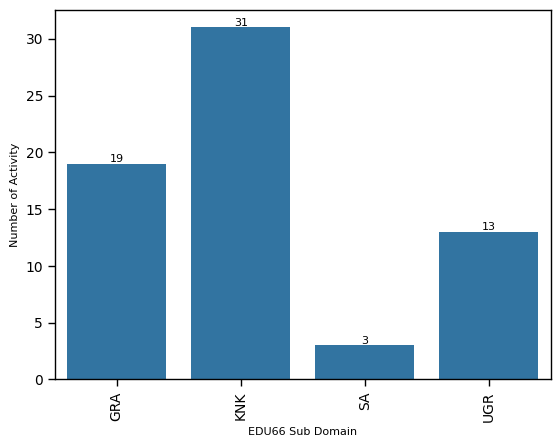

In [ ]:
sns.set_context("paper", rc = {"font.size":8,"axes.titlesize":16,"axes.labelsize":8})
ax = sns.countplot(x='sub_domain', data=edu66_activity)
ax.set(xlabel='EDU66 Sub Domain', ylabel='Number of Activity')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0])
ax.tick_params(labelsize=10)

In [ ]:
edu66_activity[edu66_activity.sub_domain == 'KNK']

,ID,รหัสกิจกรรม,ชื่อกิจกรรม,month,participant_type,domain,sub_domain
11,2131,EDU67.KNK.005.S,(STAFF) EDU Worldwide,7,Staff,EDU67,KNK
12,2132,EDU67.KNK.005.P,EDU Worldwide,7,Participant,EDU67,KNK
13,2135,EDU67.KNK.004.S,(STAFF) พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,7,Staff,EDU67,KNK
14,2136,EDU67.KNK.004.P,พิธีไหว้ครู คณะครุศาสตร์ ปีการศึกษา 2567,7,Participant,EDU67,KNK
24,2159,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,8,Staff,EDU67,KNK
25,2160,EDU67.KNK.029.S,(STAFF) CU Freshy games 2024 กีฬาเพื่อนใหม่,8,Staff,EDU67,KNK
26,2161,EDU67.KNK.029.P,CU Freshy games 2024 กีฬาเพื่อนใหม่,8,Participant,EDU67,KNK
39,2174,EDU67.KNK.008.S,(STAFF) พบปะกับอิงคลิศ ประจำปีการศึกษา 2567,8,Staff,EDU67,KNK
40,2175,EDU67.KNK.008.P,พบปะกับอิงคลิศ ประจำปีการศึกษา 2567,8,Participant,EDU67,KNK
41,2176,EDU67.KNK.009.S,(STAFF) ก้าวแรกสู่โต้วาที ปีการศึกษา 2567,8,Staff,EDU67,KNK


### Visualization 3
score count


In [ ]:
all_student_checkin_num

,รหัสนิสิต,score
0,6035530831,0.0
1,6044137327,0.0
2,6132128823,0.0
3,6134061725,0.0
4,6230001631,0.0
...,...,...
3555,6750066540,4.5
3556,6750067140,4.5
3557,6750068840,6.0
3558,6750071640,4.5


In [ ]:
all_student_checkin_num.score.mean()

np.float64(2.75561797752809)

In [ ]:
real_mean = 4 + 0.8901098901098905 / 1.5

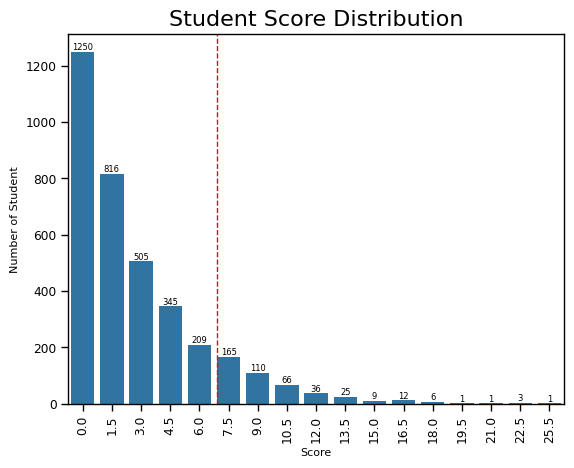

In [ ]:
ax = sns.countplot(x='score', data=all_student_checkin_num)
ax.set(xlabel='Score', ylabel='Number of Student')
ax.set_title("Student Score Distribution")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=6)
ax.axvline(x=real_mean, c='r', ls='--', lw=1)

In [ ]:
all_student_checkin_num.score.mean()

np.float64(2.75561797752809)

In [ ]:
all_student_checkin_num.score = all_student_checkin_num.score.apply(lambda x: x if x< 15 else 15)
all_student_checkin_num.score.value_counts()

,count
score,
0.0,1250
1.5,816
3.0,505
4.5,345
6.0,209
7.5,165
9.0,110
10.5,66
12.0,36


In [ ]:
rounded_mean = 4 +(0.318258664412511)/1.5
rounded_mean

4.212172442941674

In [ ]:
all_student_checkin_num.score.mean()

np.float64(2.7332865168539326)

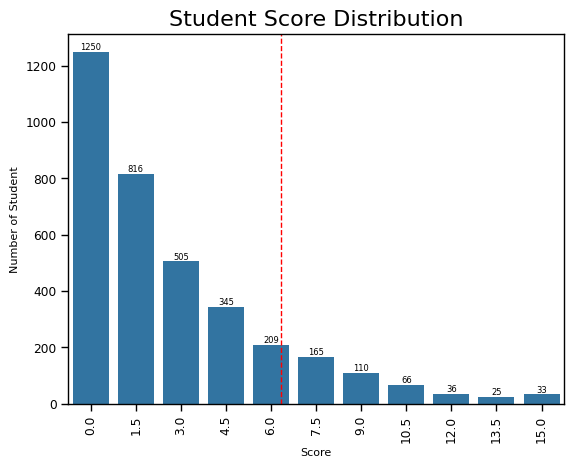

In [ ]:
ax = sns.countplot(x='score', data=all_student_checkin_num)
ax.set(xlabel='Score', ylabel='Number of Student')
ax.set_title("Student Score Distribution")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=6)
ax.axvline(x=rounded_mean,color='r', linestyle='--', linewidth=1)

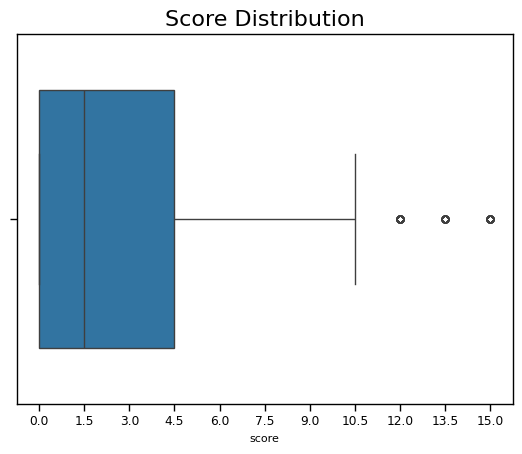

In [ ]:
ax = sns.boxplot(x='score', data=all_student_checkin_num, width=0.7 )
ax.set_title('Score Distribution')
ax.set_xticks([0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15])

### Visualization 4
score count by year


In [ ]:
all_student_checkin_num['year'] = all_student_checkin_num['รหัสนิสิต'].apply(
    lambda x: x[:2] if x[:2] in ['64','65','66'] else '>=63')
all_student_checkin_num

,รหัสนิสิต,score,year
0,6035530831,0.0,>=63
1,6044137327,0.0,>=63
2,6132128823,0.0,>=63
3,6134061725,0.0,>=63
4,6230001631,0.0,>=63
...,...,...,...
3555,6750066540,4.5,>=63
3556,6750067140,4.5,>=63
3557,6750068840,6.0,>=63
3558,6750071640,4.5,>=63


<ipython-input-120-128e7c2eec24>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




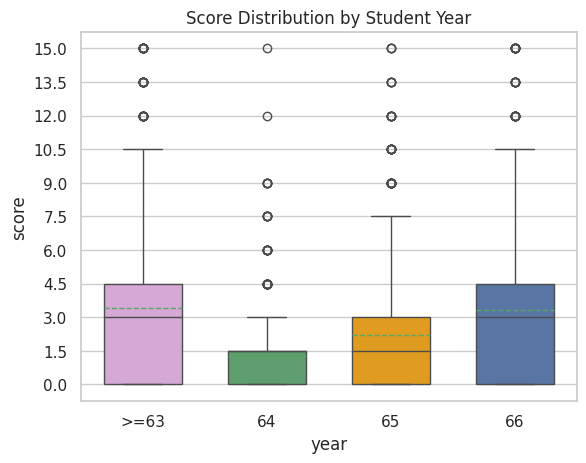

In [ ]:
sns.set(style='whitegrid')
palette = ['plum', 'g', 'orange', 'b',]
g = sns.boxplot(data=all_student_checkin_num, x="year", y="score", fill=True, gap=.1,palette=palette,
            width=0.7, dodge=False,showmeans=True,meanline=True )
g.set_title('Score Distribution by Student Year')
g.set_yticks([0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15])

## Visualization 5
score count by faculty

In [ ]:
faculty_code = {"01":"THE SIRINDHORN THAI LANGUAGE INSTITUTE","02":'OFFICE OF ACADEMIC AFFAIRS',
                "20":"GRADUATE SCHOOL", "21": "ENGINEERING", "22": "ARTS",
                "23":"SCIENCE", "24": "POLITICAL SCIENCE", "25":"ARCHITECTURE",
                "26":"COMMERCE AND ACCOUNTANCY", "27":"EDUCATION", "28":"COMMUNICATION ARTS",
                "29": "ECONOMICS", "30":"MEDICINE","31":"VETERINARY SCIENCE",
                "32": "DENTISTRY", "33":"PHARMACEUTICAL SCIENCES", "34":"LAW",
                "35":"FINE AND APPLIED ARTS", "36":"NURSING", "37":"ALLIED HEALTH SCIENCES",
                "38":"PSYCHOLOGY", "39":"SPORTS SCIENCE", "40":"SCHOOL OF AGRICULTURAL RESOURCES",
                "51":"COLLEGE OF POPULATION STUDIES","53":"COLLEGE OF PUBLIC HEALTH SCIENCES", "55":"LANGUAGE INSTITUTE",
                "56":"SCHOOL OF INTEGRATED INNOVATION", "58":"SASIN GRADUATE INSTITUTE OF BUSINESS ADMINISTION",
                "99": "OTHER UNIVERSITY"}

In [ ]:
all_student_checkin_num['faculty'] = all_student_checkin_num['รหัสนิสิต'].apply(
    lambda x: faculty_code[x[-2:]])
all_student_checkin_num.to_excel('output_Score.xlsx', index=False)

In [ ]:
student_count_by_faculty = all_student_checkin_num.faculty.value_counts().reset_index()
student_count_by_faculty

,faculty,count
0,SCIENCE,748
1,EDUCATION,616
2,ENGINEERING,409
3,ALLIED HEALTH SCIENCES,232
4,COMMERCE AND ACCOUNTANCY,220
5,POLITICAL SCIENCE,178
6,PHARMACEUTICAL SCIENCES,159
7,ARTS,154
8,SPORTS SCIENCE,148
9,VETERINARY SCIENCE,139


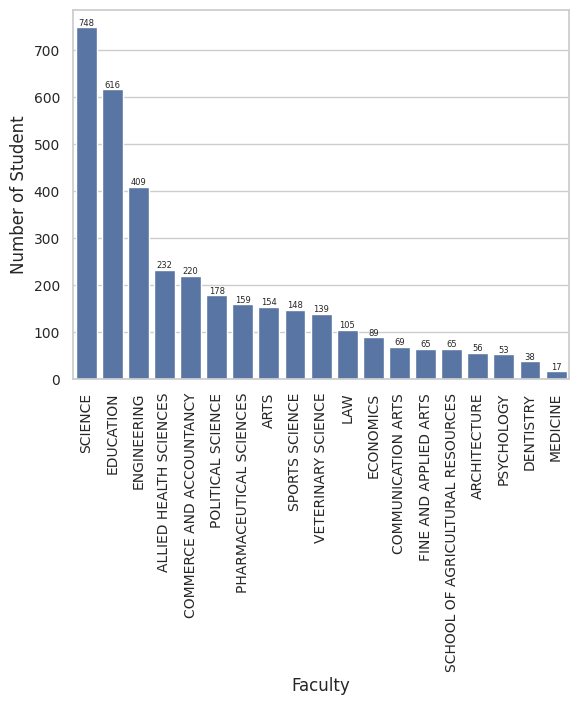

In [ ]:
import matplotlib.pyplot as plt
ax = sns.barplot(y=student_count_by_faculty['count'], x=student_count_by_faculty.faculty)
ax.set(xlabel='Faculty', ylabel='Number of Student')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=6)
ax.tick_params(labelsize=10)

<ipython-input-125-9ebe9633d37e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




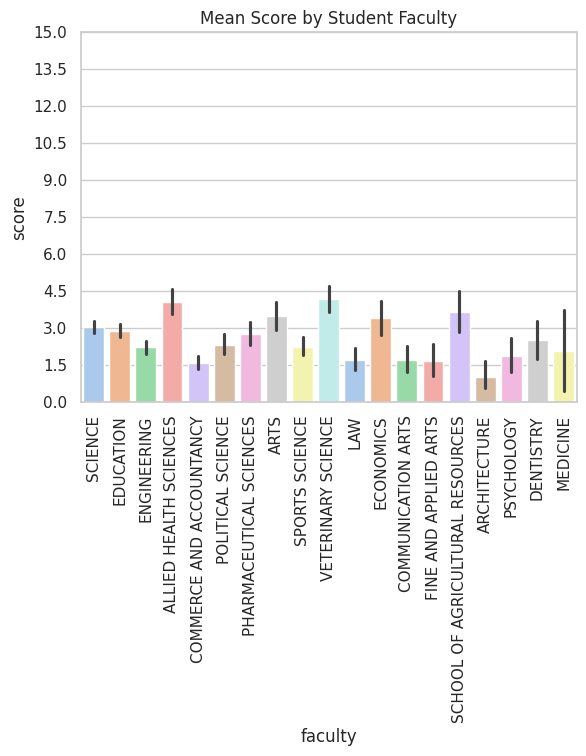

In [ ]:
ax = sns.barplot(x="faculty", y="score", data=all_student_checkin_num,palette="pastel",order=student_count_by_faculty.faculty)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Mean Score by Student Faculty')
ax.set_yticks([0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15])

Text(0.5, 1.0, 'Score Distribution by Student Faculty')

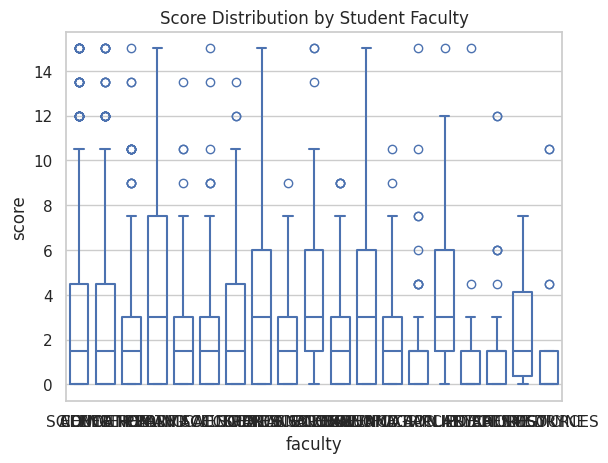

In [ ]:
g = sns.boxplot(data=all_student_checkin_num, x="faculty", y="score", fill=False, gap=.1, order=student_count_by_faculty.faculty)
g.set_title('Score Distribution by Student Faculty')

In [ ]:
under_grads_score = all_student_checkin_num[all_student_checkin_num['รหัสนิสิต'].str.match("^(?!63)")]

In [ ]:
under_grads_score

,รหัสนิสิต,score,year,faculty
0,6035530831,0.0,>=63,VETERINARY SCIENCE
1,6044137327,0.0,>=63,EDUCATION
2,6132128823,0.0,>=63,SCIENCE
3,6134061725,0.0,>=63,ARCHITECTURE
4,6230001631,0.0,>=63,VETERINARY SCIENCE
...,...,...,...,...
3555,6750066540,4.5,>=63,SCHOOL OF AGRICULTURAL RESOURCES
3556,6750067140,4.5,>=63,SCHOOL OF AGRICULTURAL RESOURCES
3557,6750068840,6.0,>=63,SCHOOL OF AGRICULTURAL RESOURCES
3558,6750071640,4.5,>=63,SCHOOL OF AGRICULTURAL RESOURCES


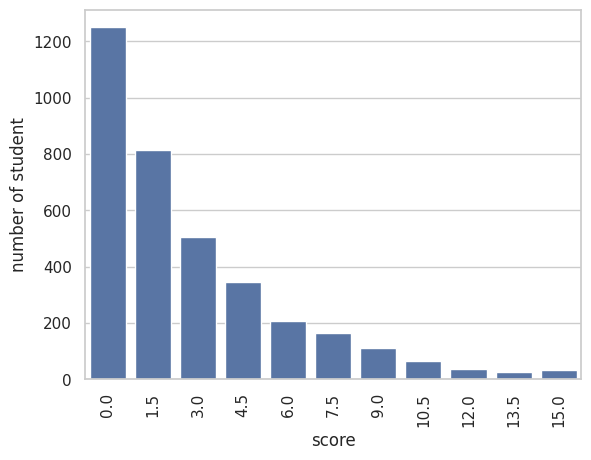

In [ ]:
activity_vs_num_student = all_student_checkin_num['score'].value_counts()
ax = sns.barplot(y=activity_vs_num_student.values, x=activity_vs_num_student.index.to_list())
ax.set(xlabel='score', ylabel='number of student')
ax.tick_params(axis='x', rotation=90)

<ipython-input-130-b82cb7826b04>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, '1202'),
 Text(0, 0, '787'),
 Text(0, 0, '495'),
 Text(0, 0, '336'),
 Text(0, 0, '206'),
 Text(0, 0, '162'),
 Text(0, 0, '107'),
 Text(0, 0, '65'),
 Text(0, 0, '36'),
 Text(0, 0, '25'),
 Text(0, 0, '33')]

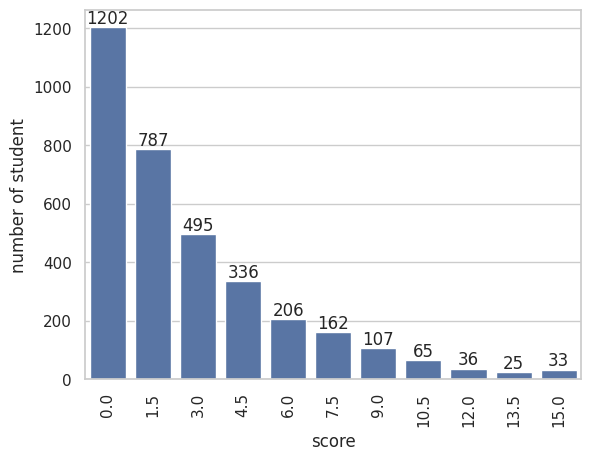

In [ ]:
under_grads_score['score'] = under_grads_score['score'].apply(lambda x: x if x<= 15 else 15)
activity_vs_num_student = under_grads_score['score'].value_counts()
ax = sns.barplot(y=activity_vs_num_student.values, x=activity_vs_num_student.index.to_list())
ax.set(xlabel='score', ylabel='number of student')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0])

# Check

In [ ]:
c = student_score_check_in.groupby("รหัสนิสิต", as_index=True, group_keys=True).apply(lambda x: x)

<ipython-input-131-602be9b2f80f>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
c.loc["6630057131"]

,รหัสนิสิต,score,ชื่อกิจกรรม
1253,6630057131,1.5,ครุวันทาสัตววิทยวิจักษ์
4137,6630057131,3.0,โครงการค่ายรณรงค์ป้องกันโรคพิษสุนัขบ้า ปีการศึ...
5126,6630057131,3.0,โครงการค่ายแนะแนวการศึกษาจุฬาฯ - ระยอง ปี 202...
5180,6630057131,1.5,มหกรรมกีฬา ปีการศึกษา 2567\nChulalympics 2025


# other

In [ ]:
##other = pd.read_csv('รายชื่อนิสิตที่ได้รับคะแนนดำรงตำแหน่งหรือทำงานพิเศษ - ตำแหน่ง.csv', )
other = pd.read_csv('ลานชมพู - คะแนนเพลท (4).csv', )

FileNotFoundError: [Errno 2] No such file or directory: 'ลานชมพู - คะแนนเพลท (4).csv'

In [ ]:
other.dtypes

In [ ]:
other = other.astype({'รหัสนิสิต': 'str'})

In [ ]:
other.head()

In [ ]:
def nested_list_dict2(df):
  act_name_score_list = []
  for index, row in df.iterrows():
    organization =  "จำนวน " + str(row['จำนวนเพลท'])
    act_name_score_list.append({'role': row['จำนวนเพลท'], 'organization': organization, 'score': row['คะแนน']})
  return act_name_score_list


In [ ]:
group_other = other.groupby("รหัสนิสิต", as_index=True, group_keys=True).apply(nested_list_dict2)
group_other

In [ ]:
group_other.to_json("other.json", orient='index')

In [ ]:
group_other["6540005027"]

In [ ]:
other_score = other[['รหัสนิสิต', "คะแนน"]].groupby("รหัสนิสิต", as_index=True, group_keys=True).sum()
other_score.reset_index(inplace=True)
other_score.rename(columns={"คะแนน": "score"}, inplace=True,)

## Combine Score

In [ ]:
all_student_checkin_num

In [ ]:
other_score

In [ ]:
##add_score.rename(columns={"studentID": "รหัสนิสิต"}, inplace=True,)
##add_score

In [ ]:
##concat_df = pd.concat([all_student_checkin_num, other_score, add_score])
concat_df = pd.concat([all_student_checkin_num, other_score])
concat_df = pd.concat([all_student_checkin_num])
final_score = concat_df.groupby("รหัสนิสิต", as_index=True, group_keys=True).sum()
final_score

In [ ]:
final_score["score"] = final_score.score.apply(lambda x: 15 if x > 15 else x)
final_score

In [ ]:
final_score.reset_index(inplace=True)

In [ ]:
#final_score.to_excel("คะแนนกิจกรรมภายในมหาวิทยาลัยของนิสิตหอพักอ้างอิงรายชื่อนิสิต.xlsx",sheet_name='คะแนน', header=["รหัสนิสิต", "คะแนน"], index=False)
# Update the header to include all column names in final_score
final_score.to_excel("คะแนนกิจกรรมภายในมหาวิทยาลัยของนิสิตหอพักอ้างอิงรายชื่อนิสิต.xlsx", sheet_name='คะแนน', header=final_score.columns.tolist())

In [ ]:
final_score['score']

In [ ]:
score = final_score['score']